## Atmospheric data 

Here we pick the annual mean data
- [CO2 data](https://gml.noaa.gov/ccgg/trends/data.html)

In [49]:
import pandas as pd 

df = pd.read_csv("../data/co2_annmean_mlo.csv", skiprows=43)
df.head()


,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


<Axes: xlabel='year'>

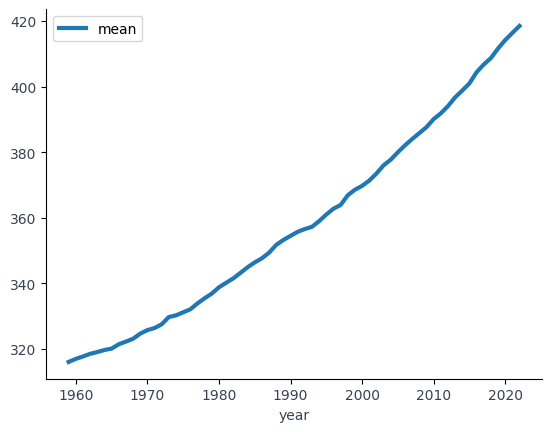

In [50]:
df.plot(x="year", y="mean")

## Storytell this visualization

In [51]:
import matplotlib.pyplot as plt 

plt.style.use("../custom_style/storytelling.mplstyle")

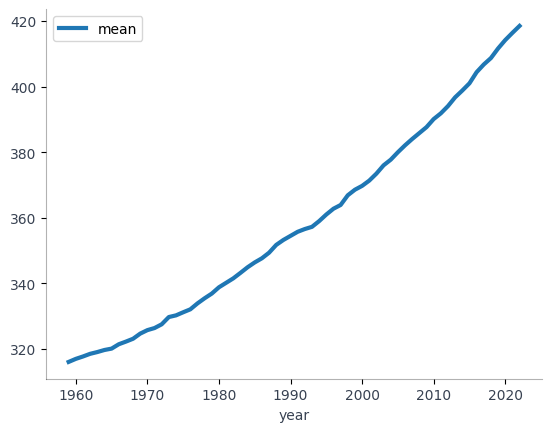

In [54]:
ax = df.plot(x="year", y ="mean")

ax.spines["left"].set_alpha(.3)
ax.spines["bottom"].set_alpha(.3)


